In [222]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
import numpy as np

In [101]:
train_df = pd.read_csv('../Dataset/train.csv')
test_df = pd.read_csv('../Dataset/test.csv')
test_df_label = pd.read_csv('../Dataset/gender_submission.csv')

In [102]:
all(test_df['PassengerId'] == test_df_label['PassengerId'])

True

In [103]:
test_df['Survived'] = test_df_label['Survived']

In [104]:
del train_df['PassengerId']
del train_df['Ticket']
del train_df['Cabin']
del test_df['PassengerId']
del test_df['Ticket']
del test_df['Cabin']

train_df['Sex'] = train_df['Sex'].map({'female': 0, 'male': 1})
test_df['Sex'] = test_df['Sex'].map({'female': 0, 'male': 1})

age_avg = float(round(train_df['Age'].mean()))
train_df['Age'] = train_df['Age'].fillna(age_avg)
test_df['Age'] = test_df['Age'].fillna(age_avg)

train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Fare'] = test_df['Fare'].fillna(0.0)

train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0
5,0,3,"Moran, Mr. James",1,30.0,0,0,8.4583,2
6,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,0
7,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,1


In [105]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

x_train = train_df[feature_cols].values
x_test = test_df[feature_cols].values
y_train = train_df['Survived'].values
y_test = test_df['Survived'].values

In [212]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax),
])

In [213]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [214]:
result = model.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
28/28 [==============================] - 1s 963us/step - loss: 0.6418 - accuracy: 0.6768
Epoch 2/200
28/28 [==============================] - 0s 927us/step - loss: 0.6350 - accuracy: 0.6745
Epoch 3/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.6723
Epoch 4/200
28/28 [==============================] - 0s 926us/step - loss: 0.5901 - accuracy: 0.6891
Epoch 5/200
28/28 [==============================] - 0s 1000us/step - loss: 0.5844 - accuracy: 0.6723
Epoch 6/200
28/28 [==============================] - 0s 994us/step - loss: 0.5665 - accuracy: 0.6835
Epoch 7/200
28/28 [==============================] - 0s 815us/step - loss: 0.5466 - accuracy: 0.7116
Epoch 8/200
28/28 [==============================] - 0s 931us/step - loss: 0.5311 - accuracy: 0.7363
Epoch 9/200
28/28 [==============================] - 0s 896us/step - loss: 0.5188 - accuracy: 0.7565
Epoch 10/200
28/28 [==============================] - 0s 908us/step - loss: 0.4894 - accurac

In [215]:
test_result = model.evaluate(x_test, y_test, batch_size=32)

14/14 [==============================] - 0s 931us/step - loss: 0.4166 - accuracy: 0.9402


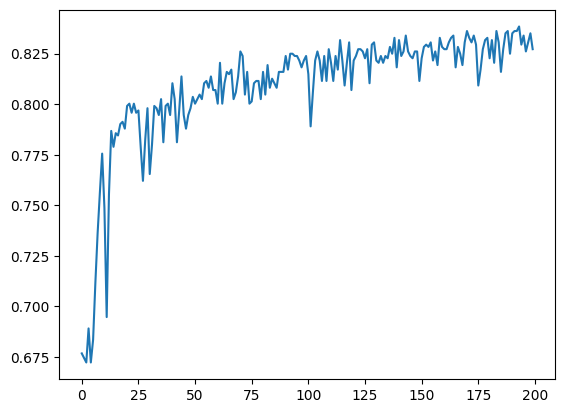

In [216]:
plt.plot(result.history['accuracy'], label='accuracy train')
plt.show()

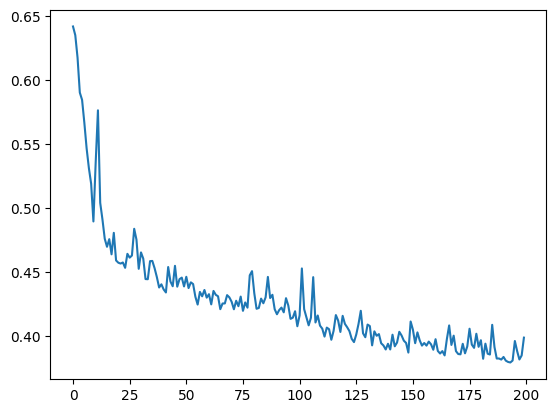

In [217]:
plt.plot(result.history['loss'], label='loss train')
plt.show()

In [221]:
y_pred = model.predict(x_test)

14/14 [==============================] - 0s 771us/step


In [226]:
labels = np.where(y_pred[:, 0] > y_pred[:, 1], 0, 1)

In [227]:
precision = precision_score(y_test, labels)
recall = recall_score(y_test, labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.9379310344827586
Recall: 0.8947368421052632


In [242]:
new_data = np.array([
    [3, 1, 23, 0, 0, 5, 1], 
    [1, 0, 20, 1, 2, 100, 1]
])

result = model.predict(new_data)

1/1 [==============================] - 0s 50ms/step


In [244]:
np.where(result[:, 0] > result[:, 1], 0, 1)

array([0, 1])